# **Buenos-Aires_Real_Estate: Predicting Price with Size**

In [5]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

## **Import data**

In [6]:
df = pd.read_csv("buenos-aires-real-estate-1.csv")
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


### **Task 2.1.1: Write a function named wrangle that takes a file path as an argument and returns a DataFrame.**

**For this project, we want to build a model for apartments in Buenos Aires proper ("Capital Federal") that cost less than $400,000. Looking at the first five rows of our DataFrame, we can already see that there properties that fall outside those parameters. So our first cleaning task is to remove those observations from our dataset. Since we're using a function to import and clean our data, we'll need to make changes there.**

In [11]:
def wrangle(filepath):
    # Read CSV file into DataFrame
    df = pd.read_csv(filepath)
    
    # Subset to propertise in "Capital Federal".
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    
    # Subet to "apartments"
    mask_apt = df["property_type"] == "apartment"
    
    # Subset to propertise where "price_aprox_usd" < 400,000
    mask_price = df["price_aprox_usd"] < 400_000
    
    #Subset
    df= df[mask_ba & mask_apt & mask_price]
    
    # Remove outliers by "surface_covered_in_m2"
    low, high= df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]
    
    return df

### **Task 2.1.2: Use your wrangle function to create a DataFrame df from the CSV file data/buenos-aires-real-estate-1.csv.**

In [8]:
df = wrangle("buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


### **Task 2.1.4: Create a histogram of "surface_covered_in_m2". Make sure that the x-axis has the label "Area [sq meters]" and the plot has the title "Distribution of Apartment Sizes".**

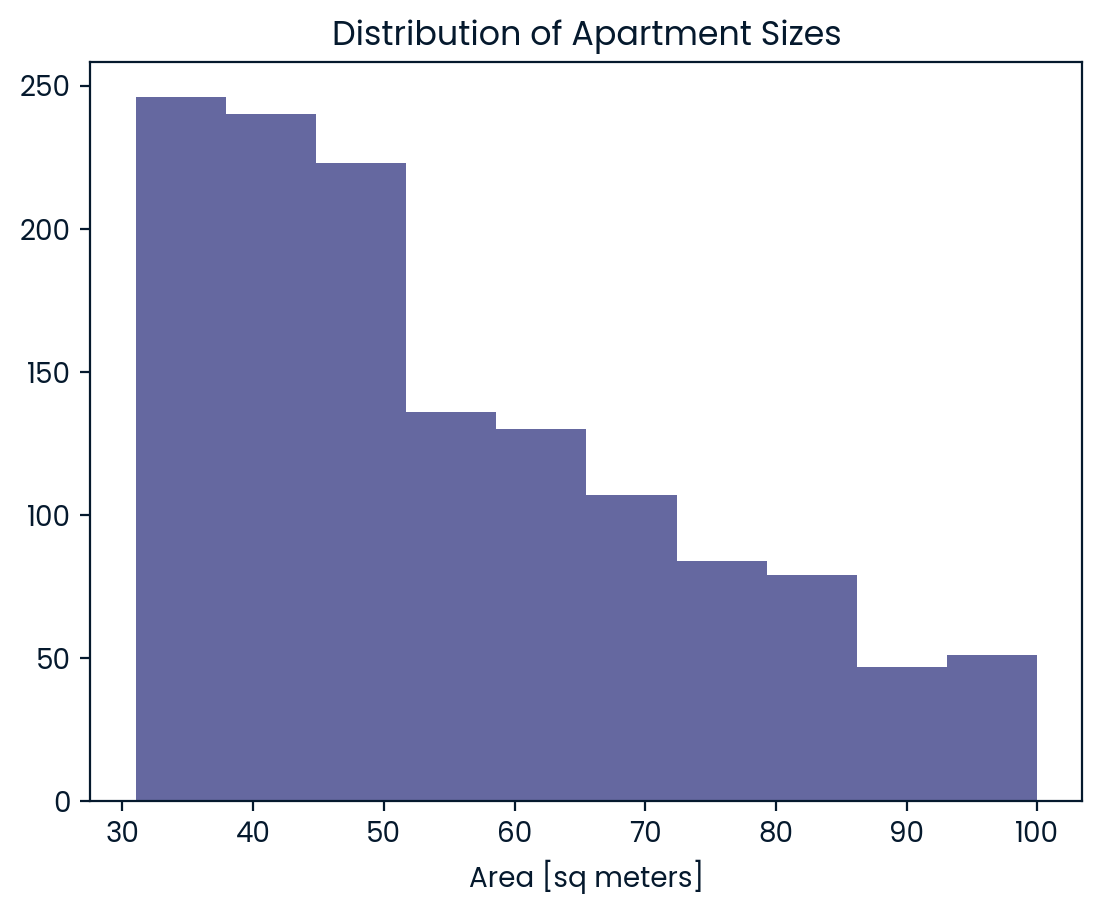

In [9]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes")
plt.show();

**Yikes! When you see a histogram like the one above, it suggests that there are outliers in your dataset. This can affect model performance — especially in the sorts of linear models we'll learn about in this project. To confirm, let's look at the summary statistics for the "surface_covered_in_m2" feature.**

### **Task 2.1.5: Calculate the summary statistics for df using the describe method.**

In [10]:
# Summary Statistics
df["surface_covered_in_m2"].describe()

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

### **Task 2.1.7: Create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset. Make sure to label your x-axis "Area [sq meters]" and your y-axis "Price [USD]".**

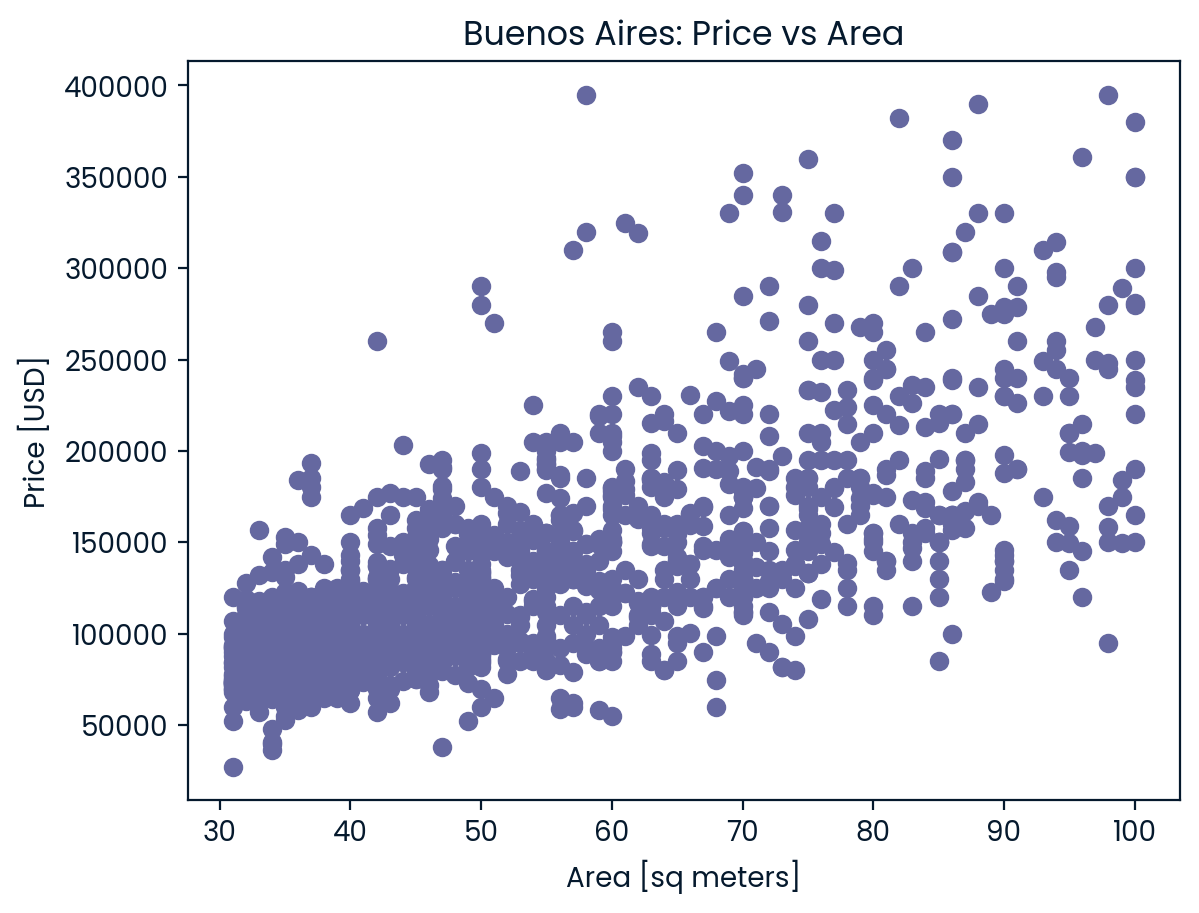

In [13]:
plt.scatter(x = df["surface_covered_in_m2"], y= df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs Area")
plt.show();

## **Split**
**A key part in any model-building project is separating your target (the thing you want to predict) from your features (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.**

### **Task 2.1.8: Create the feature matrix named X_train, which you'll use to train your model. It should contain one feature only: ["surface_covered_in_m2"]. Remember that your feature matrix should always be two-dimensional.**

In [15]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1343, 1)

### **Task 2.1.9: Create the target vector named y_train, which you'll use to train your model. Your target should be "price_aprox_usd". Remember that, in most cases, your target vector should be one-dimensional.**

In [16]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1343,)

## **Build Model**

### **Baseline**
**The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be.**

### **Task 2.1.10: Calculate the mean of your target vector y_train and assign it to the variable y_mean.
### Calculate summary statistics for a DataFrame or Series in pandas.**

In [17]:
y_mean = y_train.mean()
y_mean

135527.83871928515

### **Task 2.1.11: Create a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y.**

In [18]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515]

### **Task 2.1.12:Create a plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. Be sure that the line color is orange, and that it has the label "Baseline Model".**

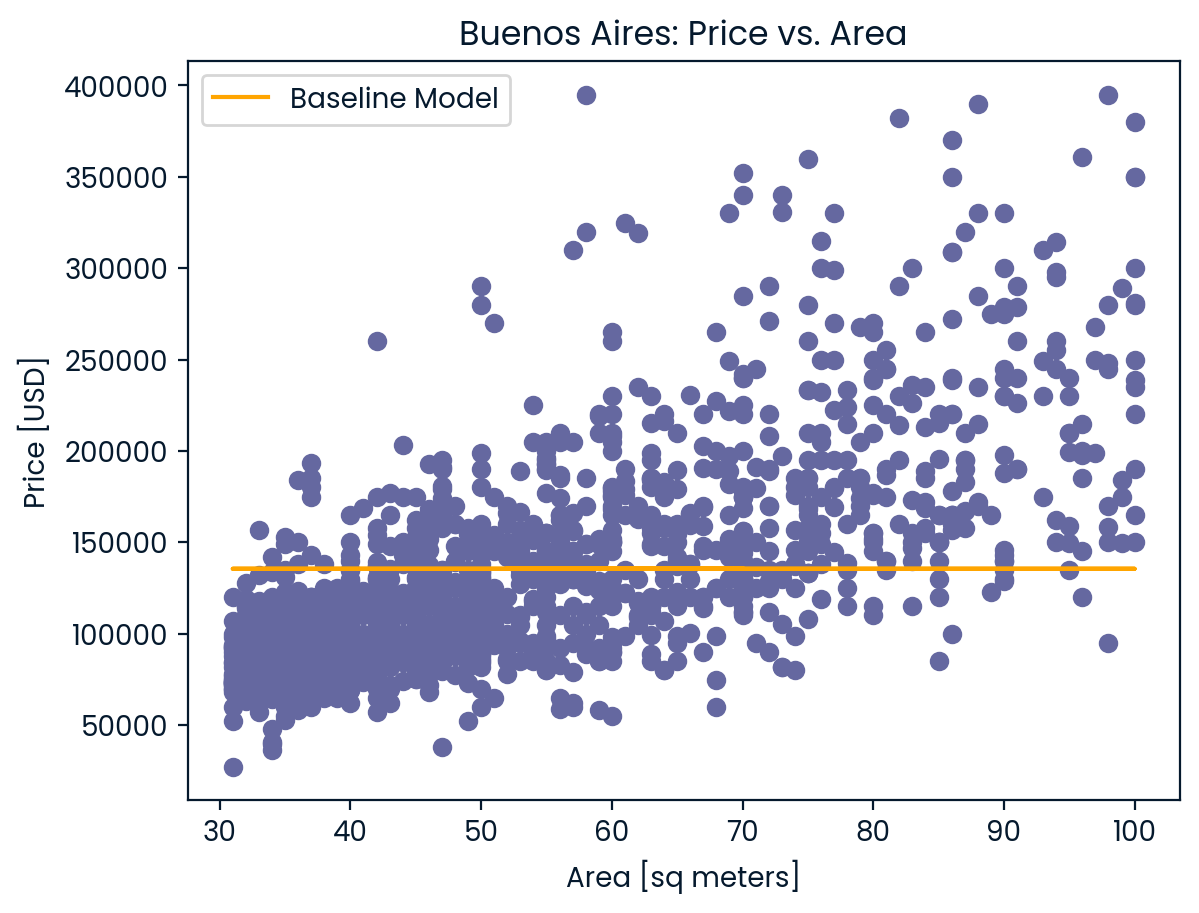

In [19]:
plt.plot(X_train, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend()
plt.show;

Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data. But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. You need an exact, mathematically calculate performance metric. There are lots of performance metrics, but the one we'll use here is the mean absolute error.

### **Task 2.1.13: Calculate the baseline mean absolute error for your predictions in y_pred_baseline as compared to the true targets in y.**

In [20]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


## **Iterate**

**The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. ☕️ Let's get started!

The first thing we need to do is create our model — in this case, one that uses linear regression.**

### **Task 2.1.14: Instantiate a LinearRegression model named model and train our model. Another way to say this is fit our model to the training data.**

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Evaluate**

**The final step is to evaluate our model. In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. So let's have it predict the price for the houses in our training set.**

### **Task 2.1.16: Using your model's predict method, create a list of predictions for the observations in your feature matrix X_train. Name this array y_pred_training.**

In [23]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

### **Task 2.1.17: Calculate your training mean absolute error for your predictions in y_pred_training as compared to the true targets in y_train.**

In [24]:
# Calculate the mean absolute error for a list of predictions in scikit-learn.
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


**Good news: Our model beat the baseline by over $10,000! That's a good indicator that it will be helpful in predicting apartment prices. 

In [27]:
#X_test = df[features]
#y_pred_test = pd.Series(model.predict(X_test))
#y_pred_test.head()

# Generate predictions using a trained model in scikit-learn.
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

## **Communicate Results**

### **Task 2.1.19: Extract the intercept from your model, and assign it to the variable intercept.**

In [29]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433.31


### **Task 2.1.20: Extract the coefficient associated "surface_covered_in_m2" in your model, and assign it to the variable coefficient.**

In [30]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)

Model coefficient for "surface_covered_in_m2": 2253.12


### **Task 2.1.21: Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size.**

In [31]:
print(f"apt_price = {intercept} + {coefficient} * surface_covered")

apt_price = 11433.31 + 2253.12 * surface_covered


### **Task 2.1.22: Add a line to the plot below that shows the relationship between the observations in X_train and your model's predictions y_pred_training. Be sure that the line color is red, and that it has the label "Linear Model".**

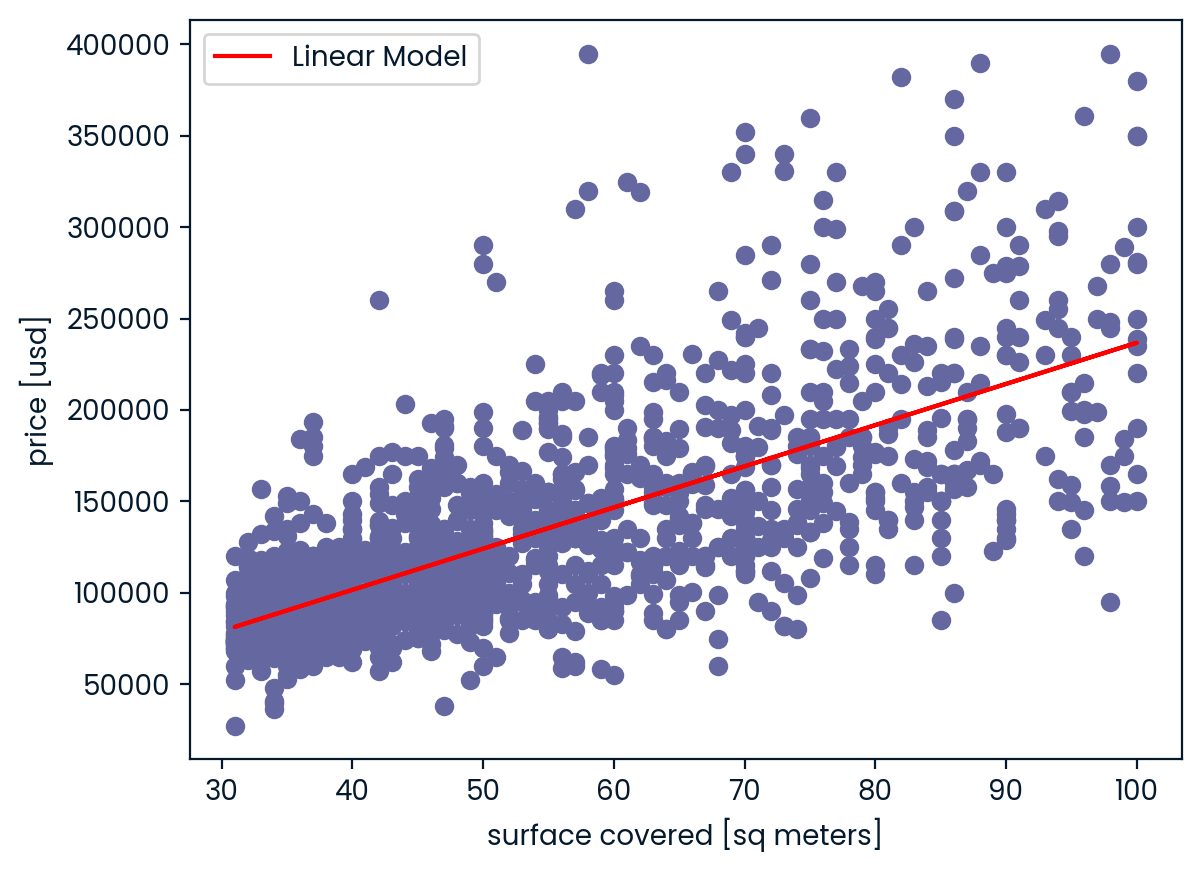

In [32]:
plt.plot(X_train, y_pred_training, color="r", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend()
plt.show(); 